In [23]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from data.load_data import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
from sklearn.metrics import classification_report, confusion_matrix
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pickle
from visualization.visualize import visualize, visualize_3d, visualize_2d

In [24]:
X, y, classes = load_data()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Preprocessing Data
X_train = X_train / 255.
X_test = X_test / 255.
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

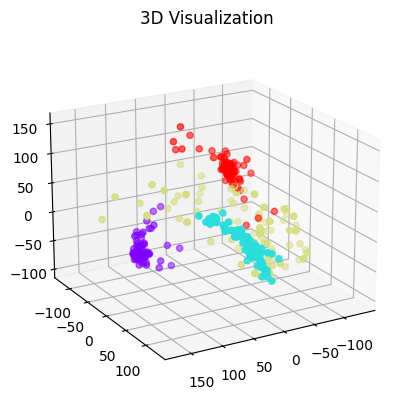

<Figure size 640x480 with 0 Axes>

In [27]:
visualize_3d(X_train ,y_train)
plt.savefig('visualization/3d.jpg')

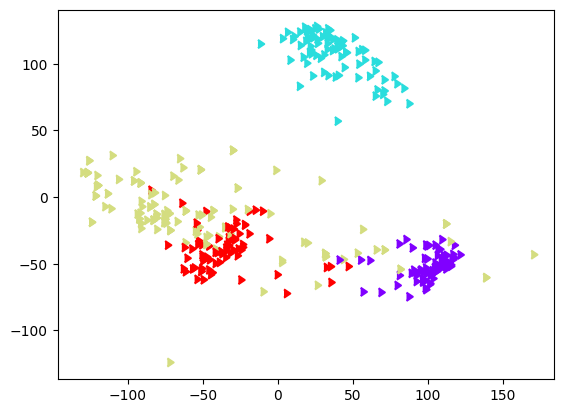

<Figure size 640x480 with 0 Axes>

In [28]:
visualize_2d(X_train, y_train)
plt.savefig('visualization/2d.jpg')

In [29]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  0  0  0]
 [ 0 17  0  0]
 [ 0  0 31  1]
 [ 0  0  0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        17
           2       1.00      0.97      0.98        32
           3       0.96      1.00      0.98        22

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



Text(0, 0.5, 'Mean Error')

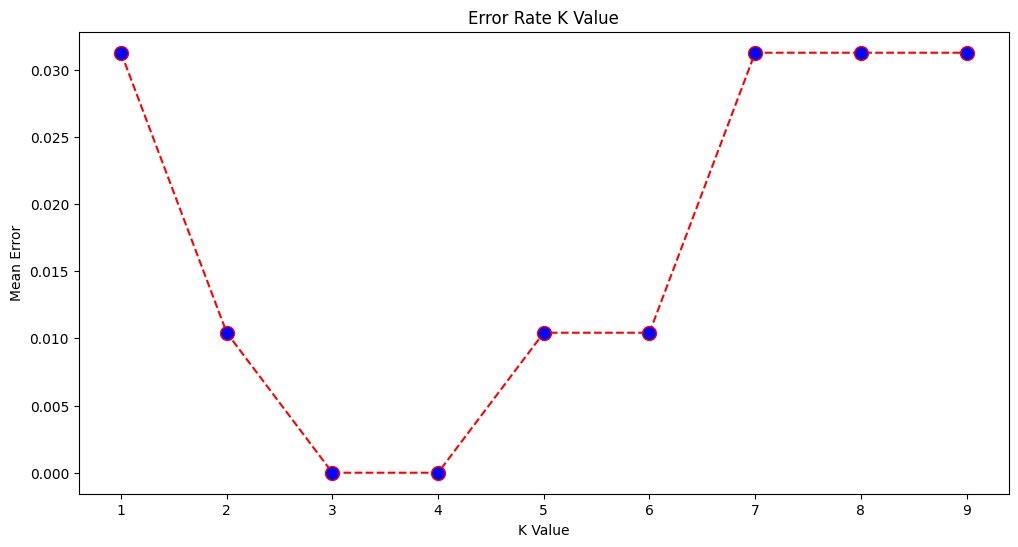

In [31]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
# filename = 'models/KNN_model'
# pickle.dump(model, open(filename, 'wb'))

In [33]:
model = SVC(kernel = 'linear', probability= True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [34]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  0  0  0]
 [ 0 17  0  0]
 [ 0  0 32  0]
 [ 0  0  0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        22

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [35]:
pickle.dump(model, open('models/SVM_model.pkl', 'wb'))

In [36]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
    SVC(kernel = 'linear', probability= True),
    KNeighborsClassifier(n_neighbors=5)
]

acc = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(np.mean(y_pred == y_test))

Text(0, 0.5, 'Accuracy')

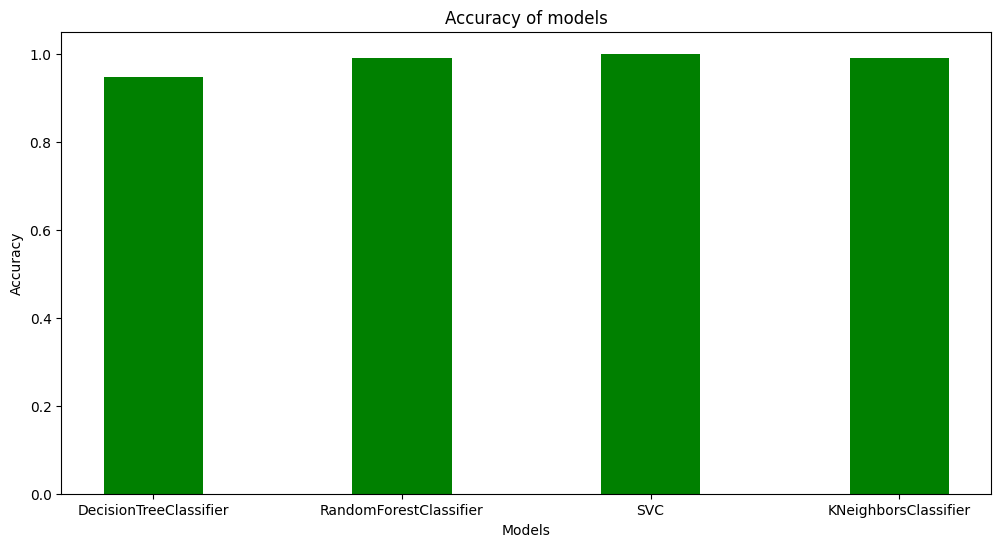

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier'], acc, color='green', linestyle='dashed', width=0.4)
plt.title('Accuracy of models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
